### Assignment 9
### Rania Siddiqui 07494
### rs07494@st.habib.edu.pk

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('karachi-weather-2021-2023.csv')
df

,datetime,temp
0,1/1/2021,15.0
1,1/2/2021,15.4
2,1/3/2021,15.6
3,1/4/2021,16.3
4,1/5/2021,17.1
...,...,...
841,4/22/2023,29.5
842,4/23/2023,30.0
843,4/24/2023,30.4
844,4/25/2023,29.9


In [3]:
#Question 1
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
df.index = pd.to_datetime(df.index)

weekly_mean = df.resample('W').mean()
weekly_mean

,temp
datetime,
2021-01-03,15.333333
2021-01-10,16.028571
2021-01-17,17.085714
2021-01-24,19.457143
2021-01-31,17.800000
...,...
2023-04-02,26.414286
2023-04-09,27.328571
2023-04-16,27.628571


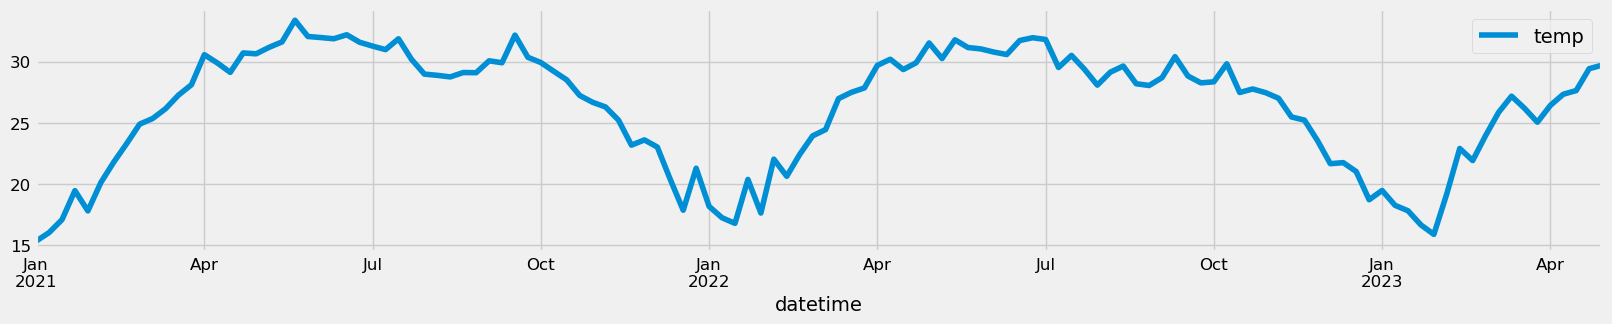

In [7]:
#Question 2 

weekly_mean.plot(figsize=(18, 3))
plt.show()


#####  The provided graph illustrates the average weekly temperature fluctuations in Karachi spanning from January 2021 to April 2023. Notably, the graph depicts varying peaks and troughs, indicating the dynamic nature of Karachi's temperature throughout the months. It is evident that the temperature is not constant but undergoes fluctuations. January registers the lowest temperature, while May and June consistently record  the highest temperatures, exceeding 30 degrees Celsius. In summary, this plot serves as a valuable tool for observing the temperature trends in Karachi from early 2021 to mid-2023.

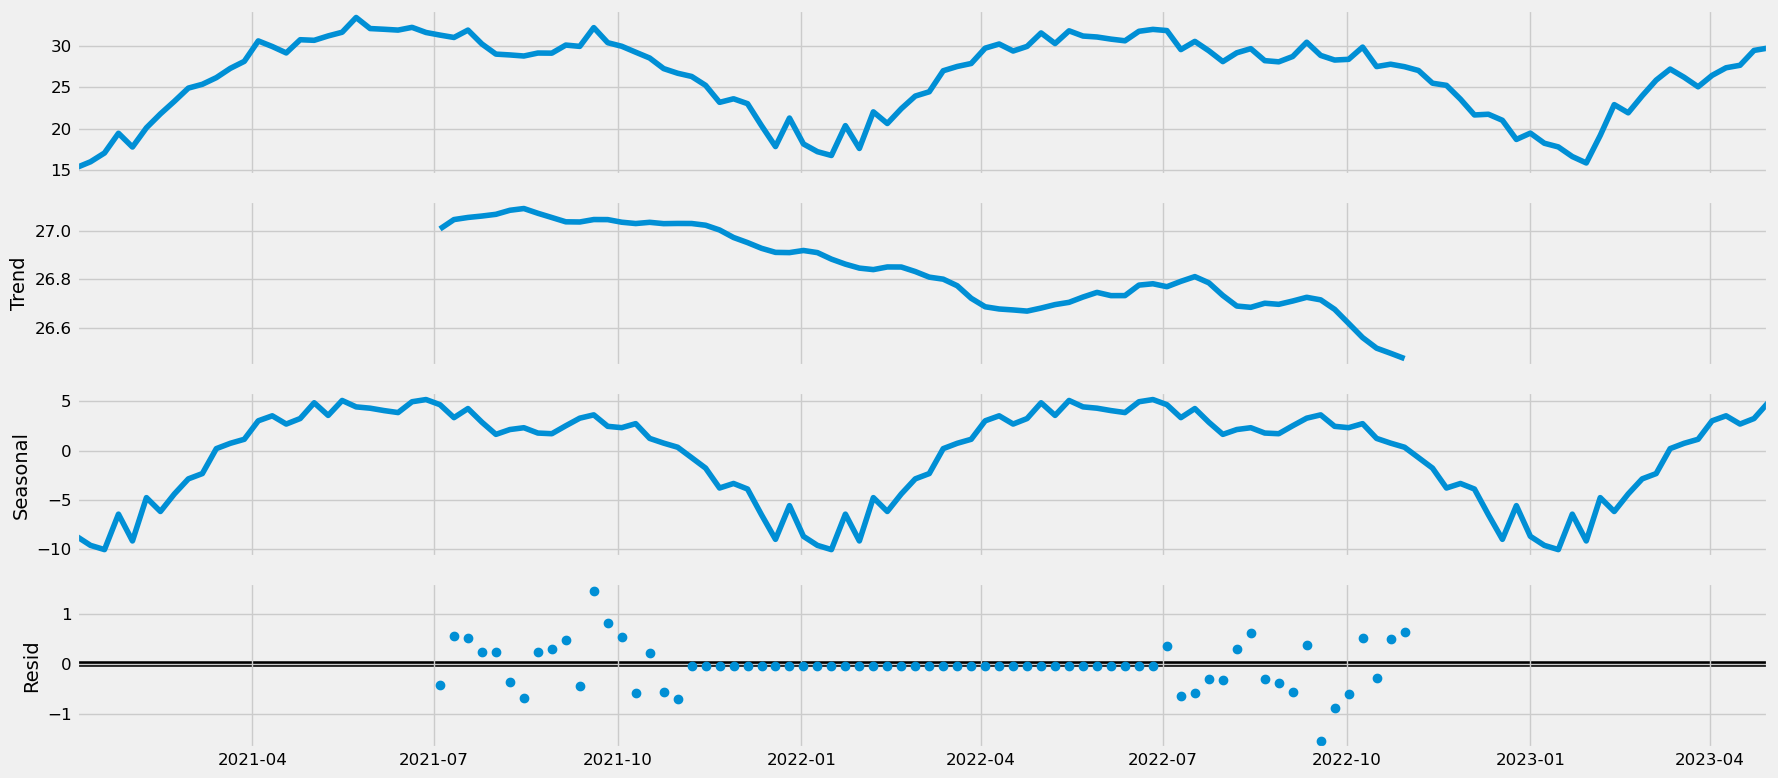

In [10]:
decomposition = sm.tsa.seasonal_decompose(weekly_mean, model='additive')
rcParams['figure.figsize'] = (18, 8)
fig = decomposition.plot()
plt.show()

##### The decomposition consists of three different aspects i.e. Trend, Residual and and Seasonality which are shown in above visualization. After looking at the trend visualization, we observe that there is a decrease in temperature in the last years. For instance, there is a noticeable dip after October 2022, highlighting a prolonged temperature decrease. One reason might be the prolonged moonsoon seasons in Karachi as there are increased urban flooding in the city recently as compared to previous decade.

##### The second visualization shows seasonality. It suggests that temperatures tend to be higher than average most of the year and then there is a significant drop in the graph during winters suggesting temperature gets lower for a short period of two to three months. Overall, this graph effectively shows the temperature trends in the city.

##### The third graph is of residual, which shows unexplained variations in temperature data not accounted for by the trend or seasonal components. It highlights points where temperatures differ significantly from expected trends, which could be due to external factors such as weather abnormalities or measurement errors in data. In essence, this graph offers information about the overall temperature variations.e.

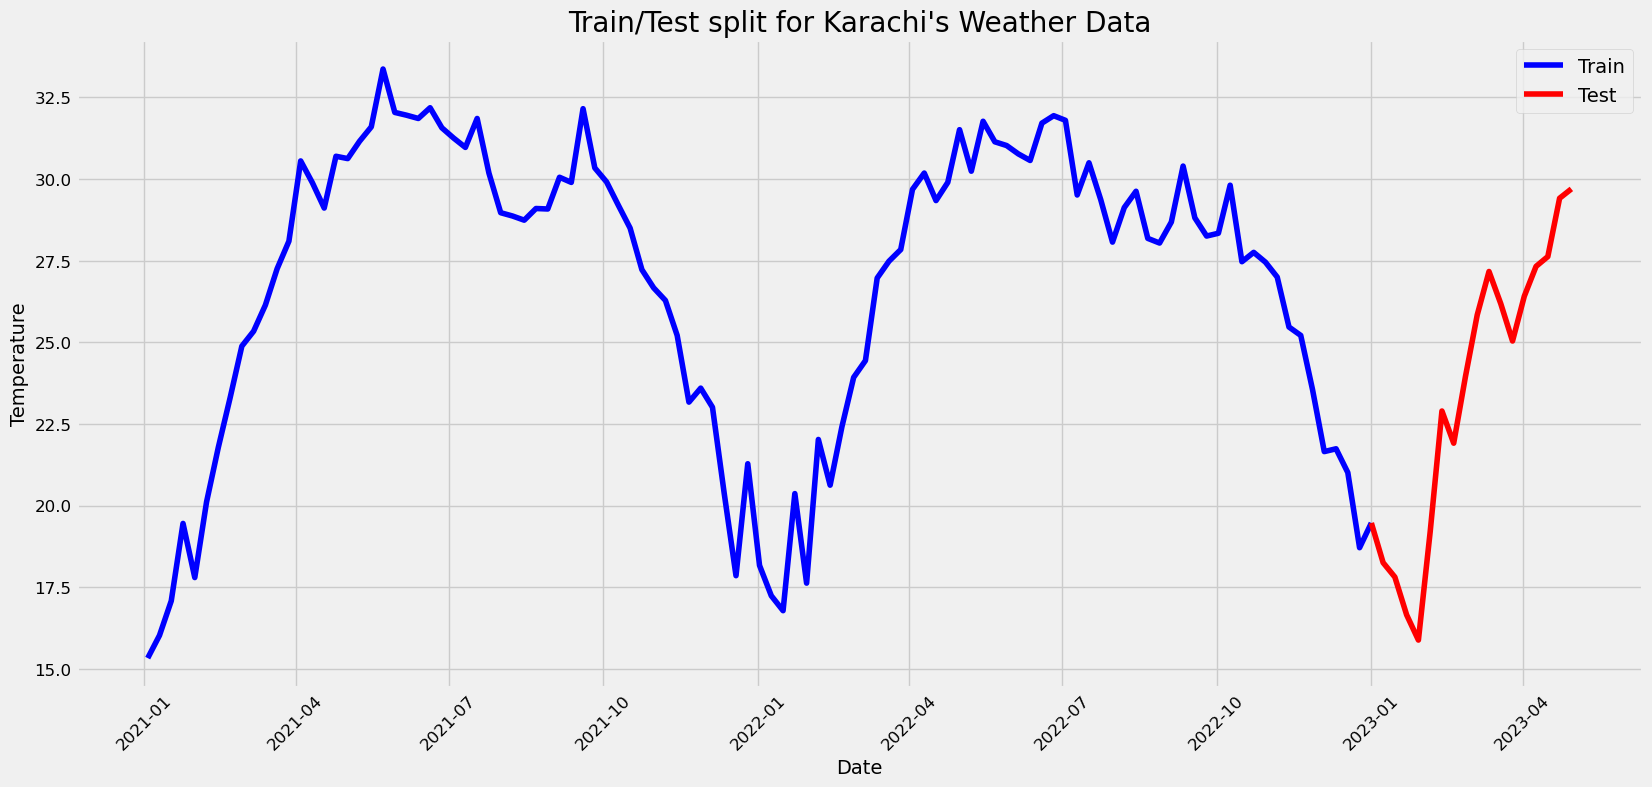

In [13]:
## Question 3

train_set = weekly_mean[weekly_mean.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
test_set = weekly_mean[weekly_mean.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')

plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Karachi's Weather Data")
plt.legend()
plt.show()

##### The above graph shows our dataset. The black line shows the data in the training model and the red line depicts the data in the testing model.

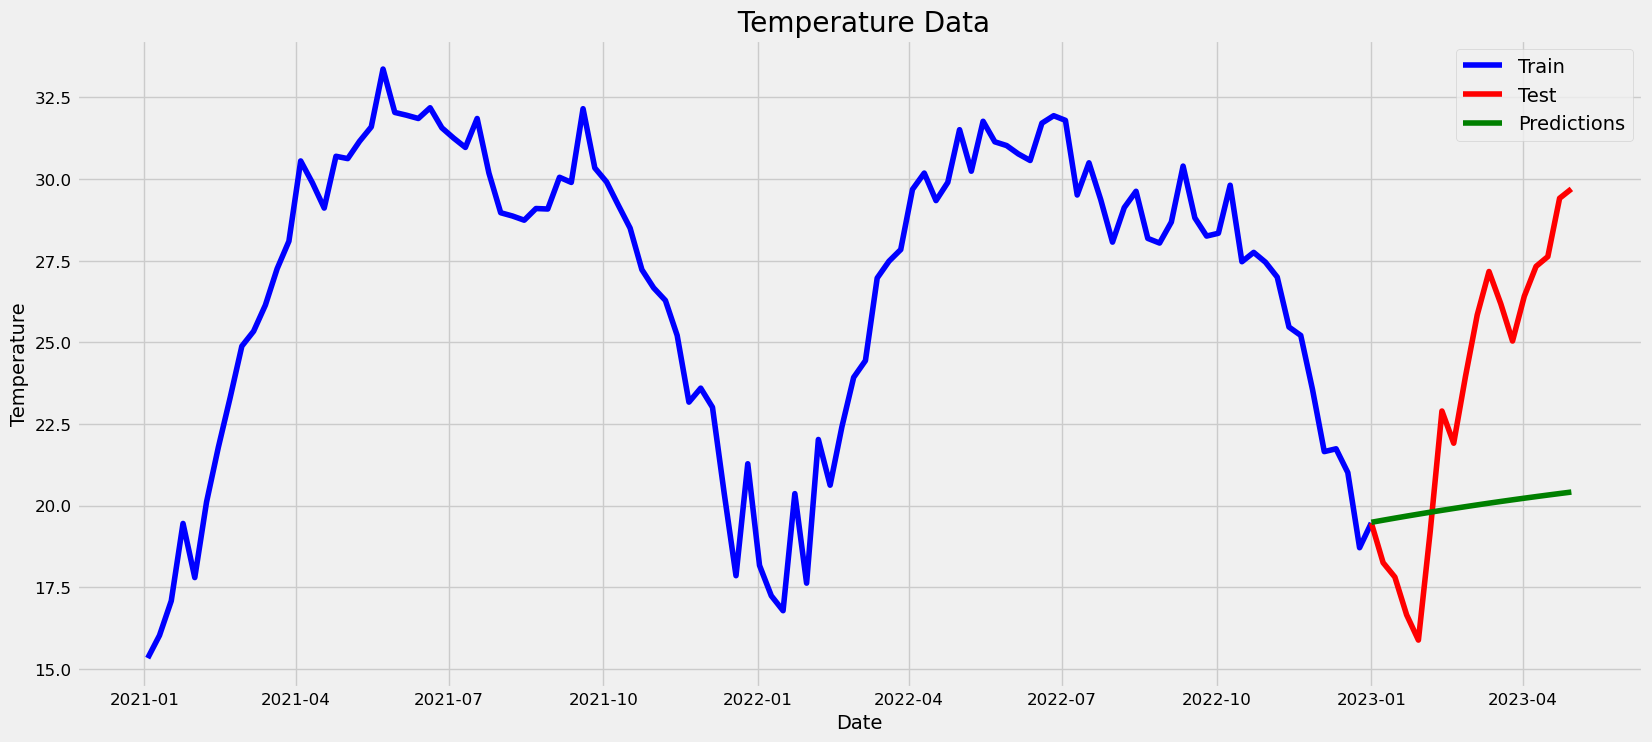

RMSE:  5.333699292466581


In [16]:
# Question 4
ARIMAmodel = ARIMA(train_set, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_set.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting 
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title(" Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [18]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -185.835
Date:                Mon, 11 Nov 2024   AIC                            379.669
Time:                        15:38:45   BIC                            390.285
Sample:                    01-03-2021   HQIC                           383.971
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4693      3.881      5.790      0.000      14.863      30.075
ar.L1          0.9783      0.024     39.979      0.000       0.930       1.026
ma.L1         -0.1032      0.089     -1.163      0.2

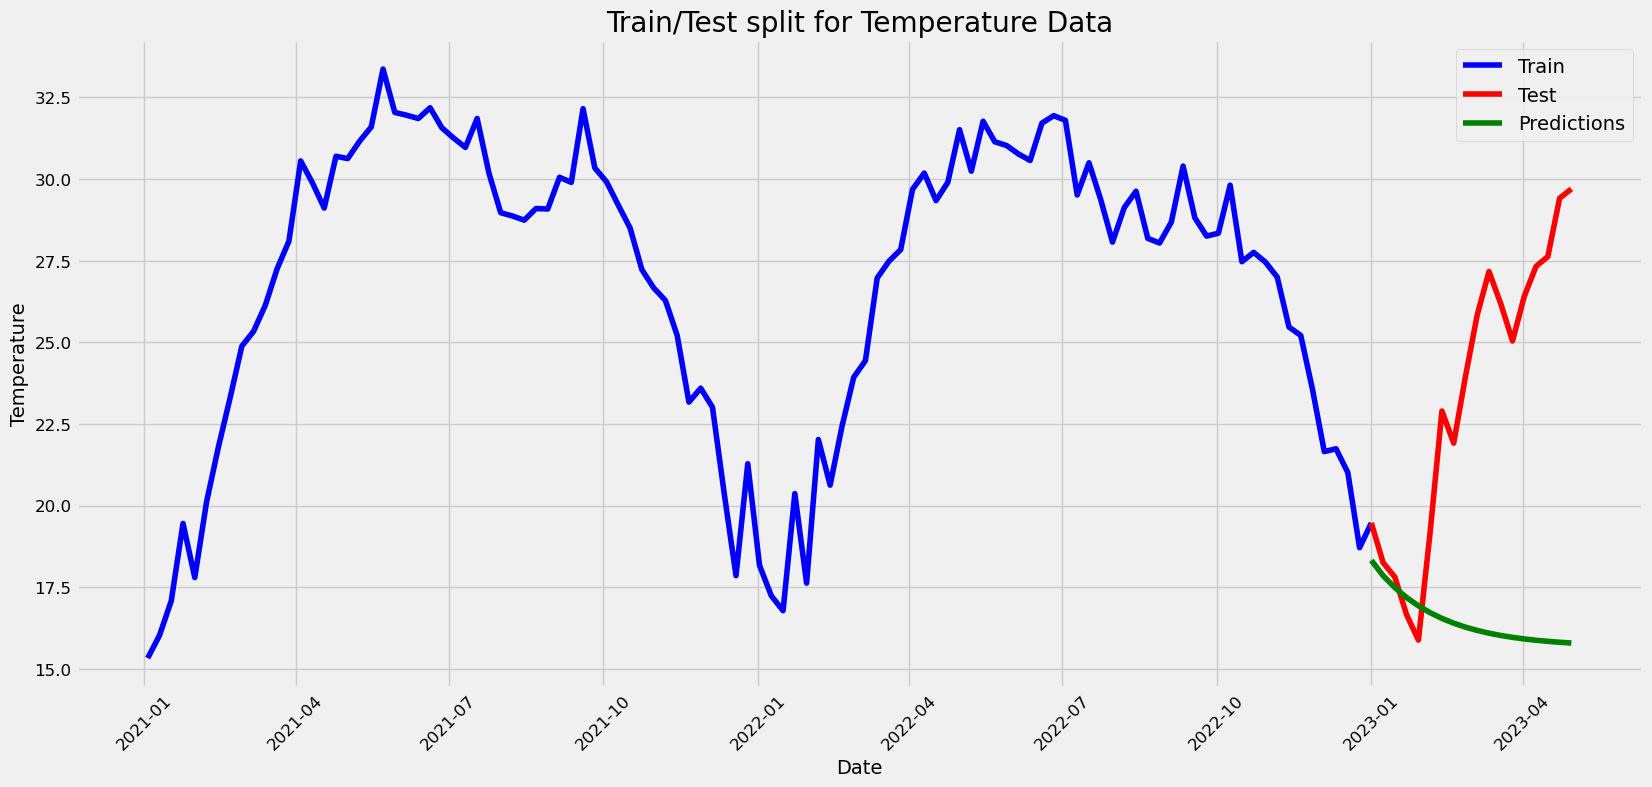

RMSE:  8.493311525437383


In [20]:
ARIMAmodel = ARIMA(train_set, order = (2, 1, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_set.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting 
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [22]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -168.978
Date:                Mon, 11 Nov 2024   AIC                            347.957
Time:                        15:38:53   BIC                            361.179
Sample:                    01-03-2021   HQIC                           353.314
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8786      0.199      4.426      0.000       0.489       1.268
ar.L2         -0.0388      0.205     -0.189      0.850      -0.440       0.362
ma.L1         -1.2279      0.154     -7.970      0.0

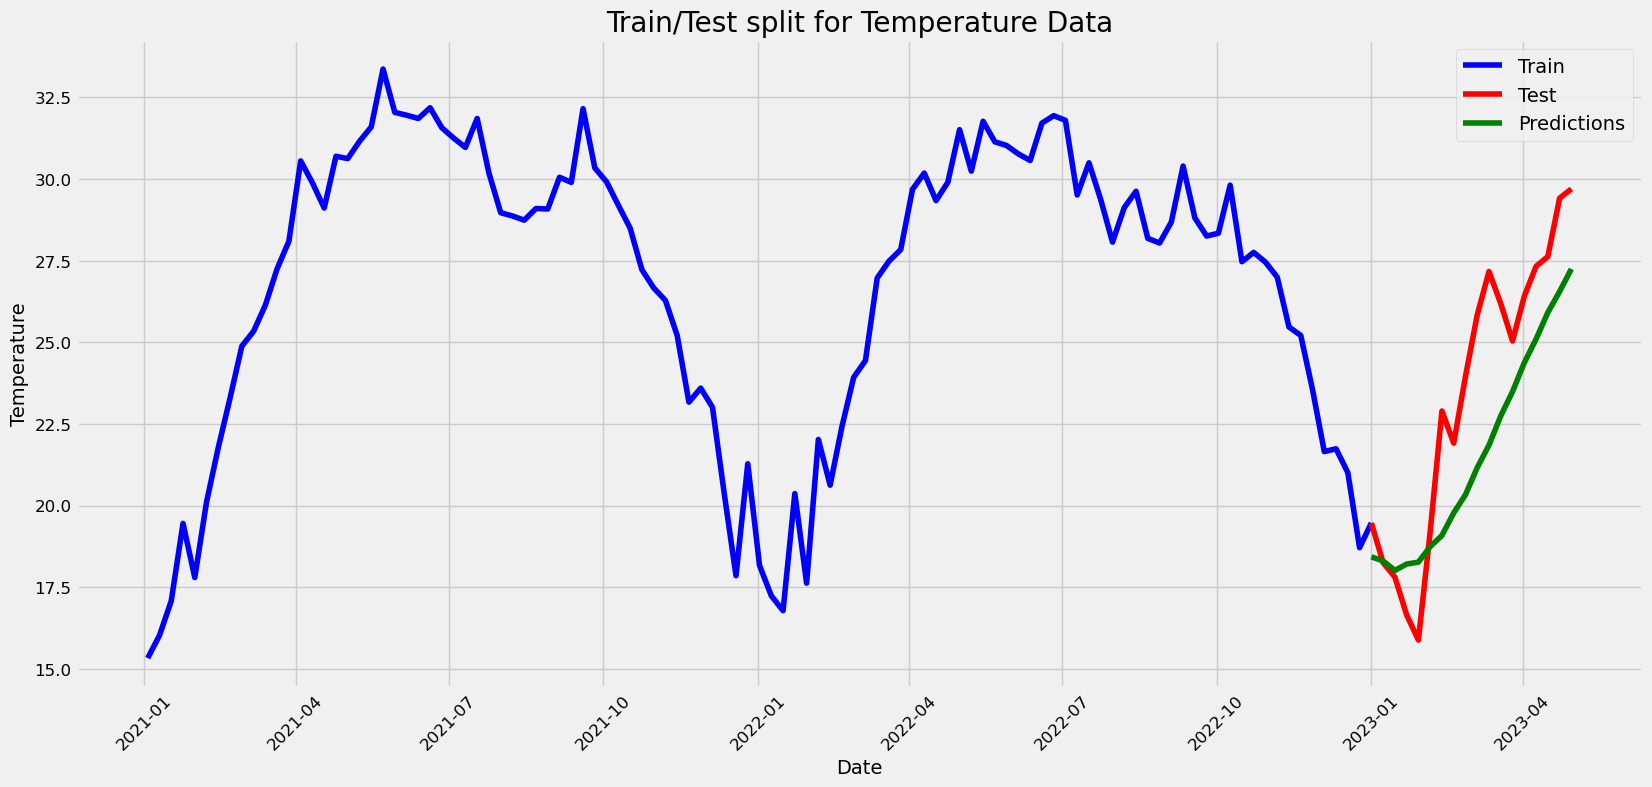

RMSE:  2.7098780091935417


In [24]:
ARIMAmodel = ARIMA(train_set, order = (3, 0, 3))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_set.index)) #only providing dates (test.index) from test as input for forecasting
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

#for plotting 
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

arma_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [26]:
print(ARIMAmodel.summary())

                               SARIMAX Results                                
Dep. Variable:                   temp   No. Observations:                  105
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -168.122
Date:                Mon, 11 Nov 2024   AIC                            352.243
Time:                        15:38:58   BIC                            373.475
Sample:                    01-03-2021   HQIC                           360.847
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8496      1.541     16.778      0.000      22.830      28.869
ar.L1          0.9857      0.229      4.304      0.000       0.537       1.435
ar.L2          0.8386      0.406      2.065      0.0

##### Considering the graphs and RMSE (Root Mean Square Error) values, the ARIMA model with an order of (3, 0, 3) stands out as the most precise, evidenced by its minimal RMSE of 2.709. Another notable model is the one with an order of (1, 0, 1), which achieves a commendable RMSE of 5.33. However, it's worth noting that this model requires differencing the time series once, which might lead to a loss of some information. In contrast, the model with an order of (2, 1, 2) shows a slightly higher RMSE of 8.49, suggesting it could also be a strong contender for accurate predictions. In ARIMA model analysis, an RMSE of 5.33 indicates that the model's forecasts, on average, vary from the actual figures by about 5.33 units. Generally, a model with a lower RMSE is considered more accurate as it indicates predictions that are closer to real values, whereas a higher RMSE points to less precision and larger discrepancies between predictions and actual figures. Thus, the ARIMA model with an order of (3, 0, 3) is identified as the most accurate among the ones mentioned.

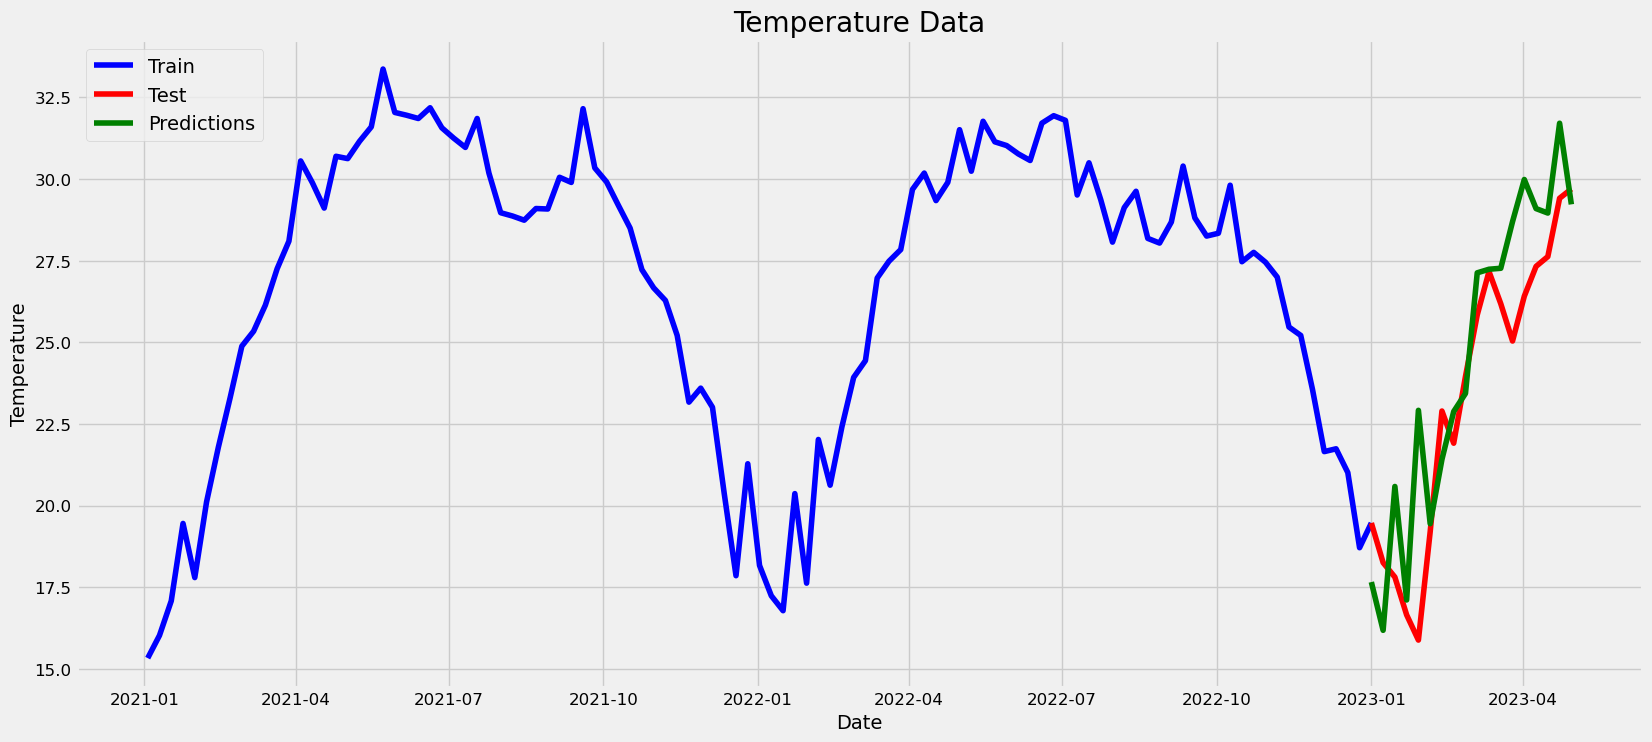

RMSE:  2.447712089394363
                                     SARIMAX Results                                      
Dep. Variable:                               temp   No. Observations:                  105
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 52)   Log Likelihood                 -87.453
Date:                            Mon, 11 Nov 2024   AIC                            182.907
Time:                                    15:39:40   BIC                            190.712
Sample:                                01-03-2021   HQIC                           185.899
                                     - 01-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8381      0.088     -9.512      0.000      -1.011      -0.665
ar.S.L52  

In [29]:
# Question 5
SARIMAXmodel = SARIMAX(train_set,order=(0, 1, 1),seasonal_order=(1, 1, 1, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

sarima_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",sarima_rmse)
print(SARIMAXmodel.summary())

#### We thoroughly integrated all key elements of the ARIMA model, encompassing the orders for trend autoregression, trend differencing, and trend moving average. For the seasonal components, our focus was primarily on the autoregressive and differencing orders. A detailed examination of the plot clearly demonstrates that the SARIMA model effectively grasped both the overall trend and seasonality present in the temperature data. This success is evident in how closely the green line follows the red line in most parts of the plot, indicating the model's capability to handle variations and noise within the dataset. The SARIMA model, when applied to the weather data, showed a root mean square error (RMSE) of 2.44. This low RMSE value signifies that the model's forecasts on average differed from the actual temperature readings by roughly 2.44 units. A smaller RMSE is an indicator of higher accuracy, denoting a strong correlation between the model's predictions and the actual data. Therefore, it can be concluded that the SARIMA model is highly effective in capturing temperature patterns and variations, making it a reliable tool for future temperature predictions.

In [31]:
# Question 6
p = d = q = range(0, 2)
P = Q = D = range(1, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(P, D, Q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
            mod = sm.tsa.statespace.SARIMAX(train_set,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(1, 1, 1, 52)52 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(0, 1, 0)x(1, 1, 1, 52)52 - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(1, 0, 0)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 52)52 - AIC:10.0
ARIMA(1, 1, 0)x(1, 1, 1, 52)52 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 52)52 - AIC:10.0


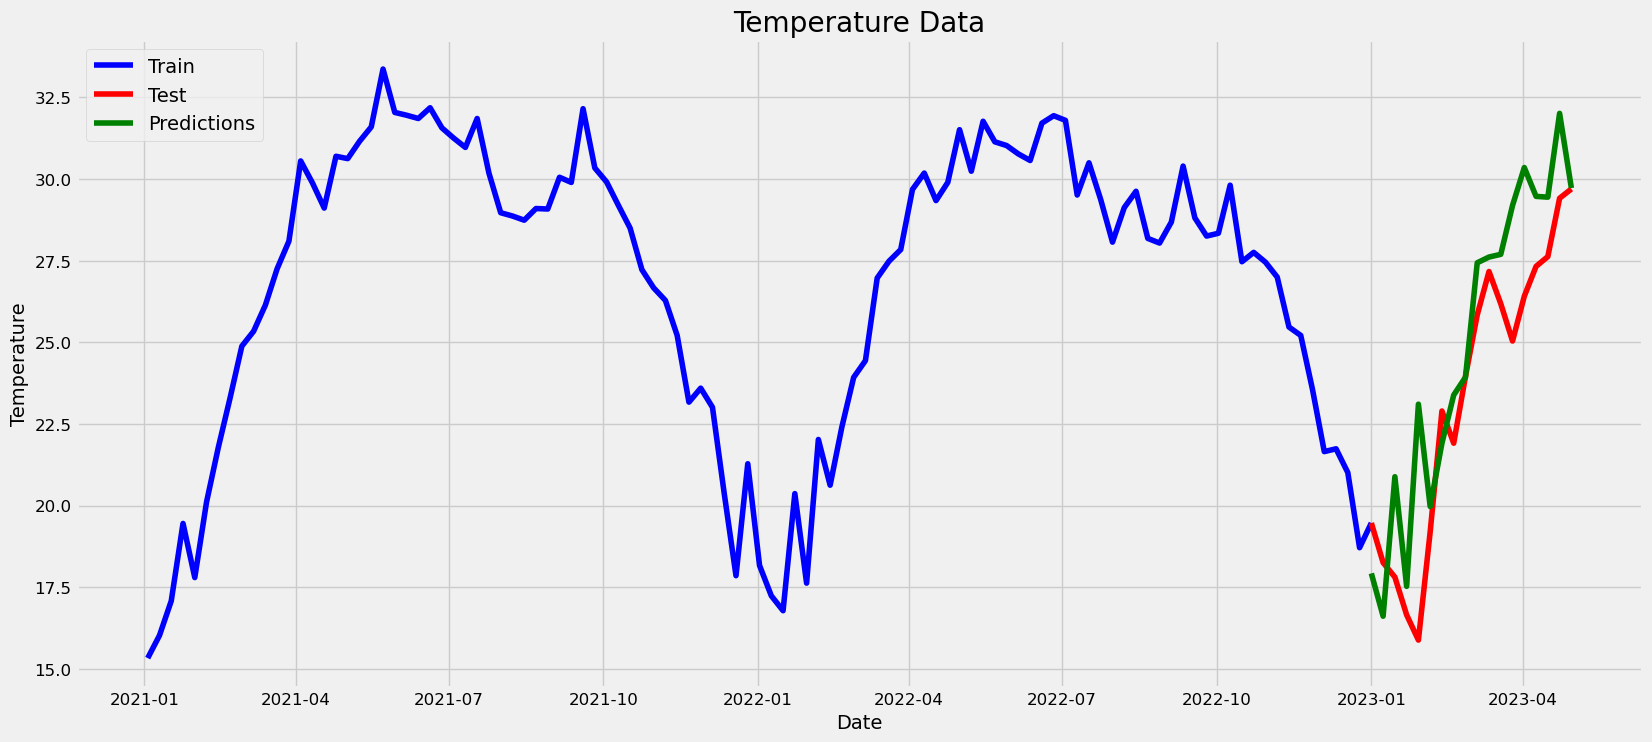

RMSE:  2.62109146406042
                                 SARIMAX Results                                  
Dep. Variable:                       temp   No. Observations:                  105
Model:             SARIMAX(1, 1, [1], 52)   Log Likelihood                 -88.316
Date:                    Mon, 11 Nov 2024   AIC                            182.633
Time:                            15:39:49   BIC                            188.544
Sample:                        01-03-2021   HQIC                           184.906
                             - 01-01-2023                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L52       0.3461   2.07e+05   1.67e-06      1.000   -4.06e+05    4.06e+05
ma.S.L52       0.3326   3.39e+05   9.81e-07      1.000   -6.64e+05    6.64e

In [32]:
SARIMAXmodel = SARIMAX(train_set,order=(0, 0, 0),seasonal_order=(1, 1, 1, 52))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_set.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_set.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train_set, color = "blue", label = 'Train')
plt.plot(test_set, color = "red", label = 'Test')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title("Temperature Data")

plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()
plt.show()

sarima_rmse = np.sqrt(mean_squared_error(test_set.values, y_pred_df["Predictions"]))
print("RMSE: ",sarima_rmse)
print(SARIMAXmodel.summary())

The RMSE for the model is around 2.62, which is higher than the RMSE for the previous model. This indicates that the model is not a good fit for the data as compared to Arima. The predicted values are not too far to the actual values, and the model is effectively showing the trend and seasonal components of the time series data. However, based on accuracy of the model, I will not use it to predict the weather temperatures for Karachi.

Comparitive Analysis:
The optimal paremeters of ARIMAX are3(6,3,6) resulting in RMSE o2.7074
The optimal paremeters of SARIMAX are (0,0,0) resulting in RMSE of 2.62.
SARIMARIMA model clearly outperforms ARIMARIMA model in terms of RMSE and accuracy.SARIMAARIMA model is a better fit for the data as compared toARIMAARIMA moerrors

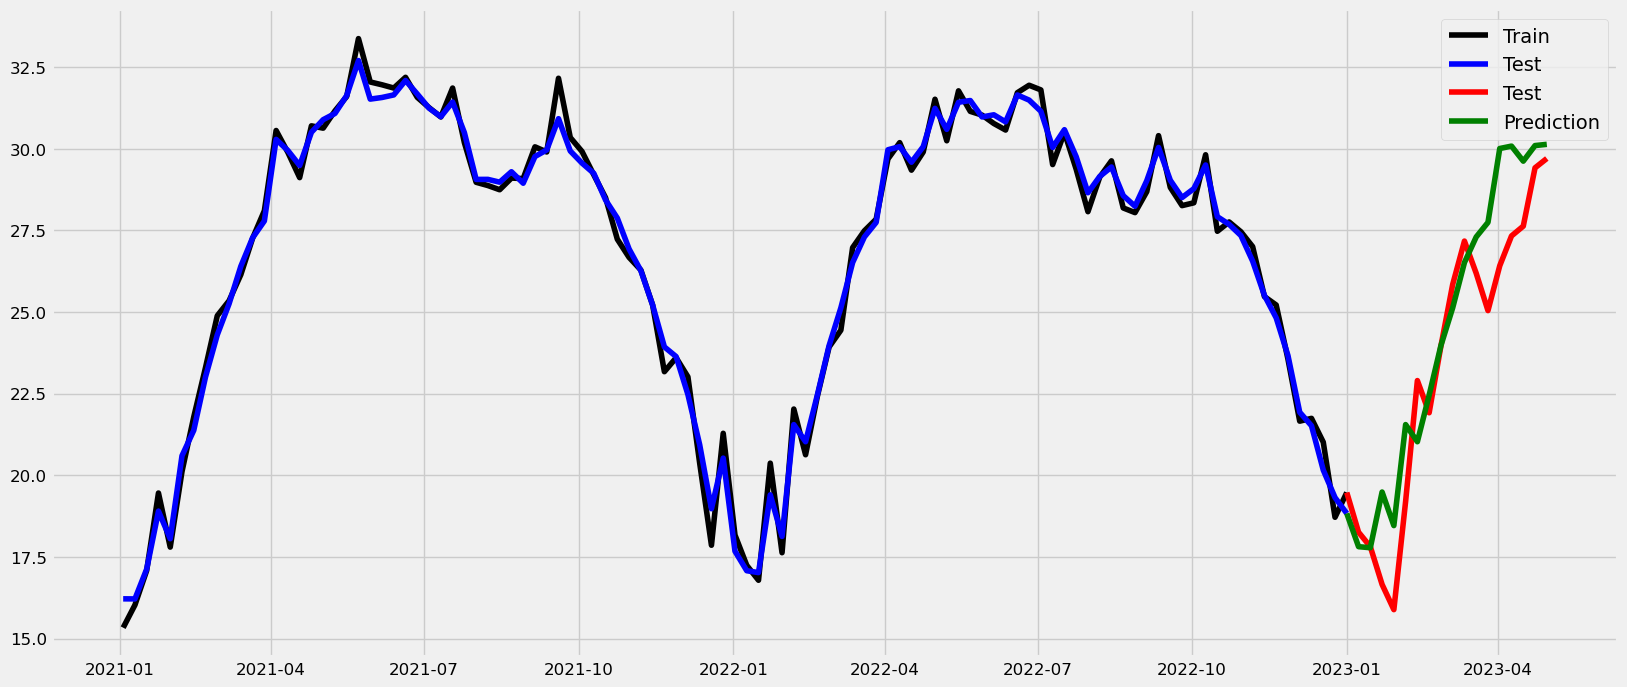

RMSE:  1.8123564108334687


In [64]:
# Question 7
import numpy as np

# extract the seasonality data
months = [x.month for x in train_set.index]
years = [x.year for x in train_set.index]
day = [x.day for x in train_set.index]
 
# convert into one matrix
X = np.array([day, months, years]).T
Y = train_set.values
 

tmonths = [x.month for x in test_set.index]
tyears = [x.year for x in test_set.index]
tday = [x.day for x in test_set.index]
 
# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = test_set.values

 
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(X,Y)

# predict for the test set period
preds_train = rfmodel.predict(X)

# predict for the test set period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(train_set.index.values, train_set.values,color="black", label='Train')
plt.plot(train_set.index.values, preds_train,color="blue", label='Test')
plt.plot(test_set.index.values, test_set.values,color="red", label='Test')
plt.plot(test_set.index.values, preds, color="green",label='Prediction')
plt.legend()
plt.show()
rf_rmse = np.sqrt(mean_squared_error(test_set.values, preds))
print("RMSE: ",rf_rmse)

##### A value of 1.81 reflects that the model's predictions, on average, differ from the actual test values by 1.81 units. This close approximation is visually confirmed in the model's graphical representation, where the green line, representing the predictions, aligns closely with the red line, which represents the actual test data. Such a close match between the predicted and actual values indicates that the regression model is functioning efficiently, producing precise forecasts.

##### Question 8
Random Forest Regression MODEL: It outperformed all other models with an RMSE of 1.81, the lowest among the group. SARIMA MODEL: Registered an RMSE of 2.447. ARIMA MODEL: Had the highest RMSE of 8.49, indicating less accuracy in its predictions compared to the others.

From these values, it's clear that the Random Forest regressor is the most effective, with the lowest RMSE and a strong correlation between its predictions and the actual data, as seen in the visualizations. On the other hand, the ARIMA model, with its considerably higher RMSE and visible prediction deviations, ranks as the least effective among the three. Therefore, in terms of RMSE values, the Random Forest is the top choice for this particular dataset. However, it's important to balance other factors such as computational complexity and interpretability when deciding on the most appropriate model for a given situation....

##### Question 9, 10, 11

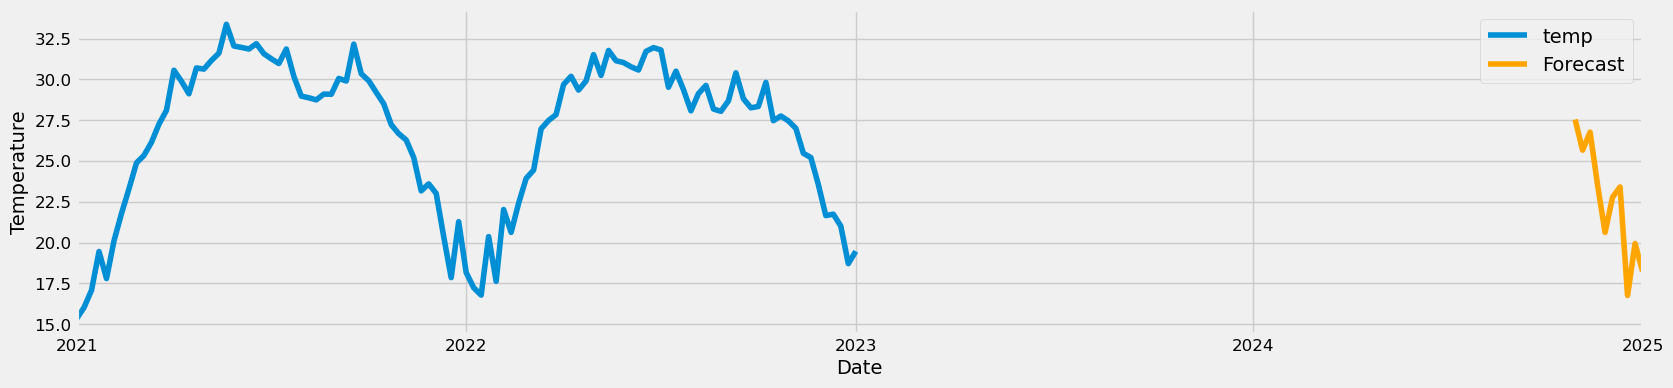

In [69]:
#Q9

pred_uc = SARIMAXmodel.predict(start=pd.to_datetime("2024-11-01"), end=pd.to_datetime("2024-12-31"), )

# Plot the observed data and forecasted values
ax = train_set.plot(label='Observed', figsize=(18, 4))
pred_uc.plot(ax=ax, label='Forecast', color='orange')

# Label the plot
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()


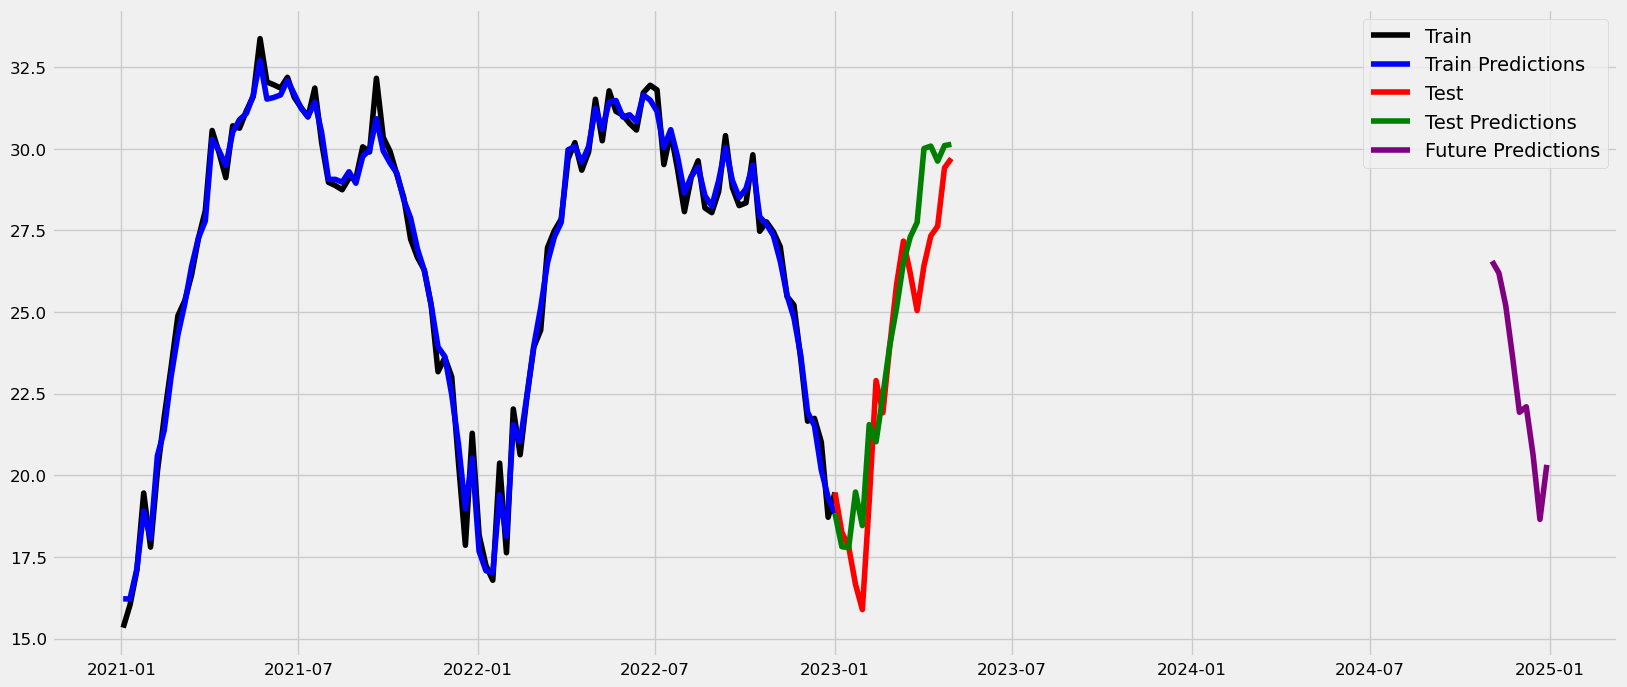

In [74]:
# Q10
future_dates = pd.date_range(start='2024-11-01', end='2024-12-31', freq='W')

# Extract day, month, and year from future_dates to create the feature matrix
tmonths = [x.month for x in future_dates]
tyears = [x.year for x in future_dates]
tdays = [x.day for x in future_dates]

# Create futureX as a feature matrix with day, month, and year
futureX = np.array([tdays, tmonths, tyears]).T

# Predict for the future date range using the fitted model
future_preds = rfmodel.predict(futureX)

# Plot the results
plt.plot(train_set.index.values, train_set.values, color="black", label='Train')
plt.plot(train_set.index.values, preds_train, color="blue", label='Train Predictions')
plt.plot(test_set.index.values, test_set.values, color="red", label='Test')
plt.plot(test_set.index.values, preds, color="green", label='Test Predictions')
plt.plot(future_dates, future_preds, color="purple", label='Future Predictions')
plt.legend()
plt.show()


Q11

Comaprison
Accuracy and Fit:
The ML model predictions seem to align more closely with actual data, particularly in the test period, suggesting higher accuracy and a better fit for this dataset.

Variability:
The ML model captures finer details in the data, while SARIMA provides a smoother trend line that might miss short-term fluctuations.

Seasonality:
Both models capture seasonal trends, but SARIMA’s approach is more generalized, whereas the ML model handles specific seasonal shifts with greater precision.